Fashion giant AZRA has severa physical stores where customers scan try and buy apparel and fashion accessories.
With increased Internet penetration and higher adoption of e-commerce among customers, the footfall to the physical stores has been decreasing.

To Optimize operation costs, the company wishes to understand the factors that affet the revenue of the store.
This will help them take better calls reguarding setting up future stores and making decisions about the existing ones.

In [2]:
import seaborn as sns , pandas as pd
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('datasets/location_rev.csv')
df

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0
...,...,...,...,...,...,...
995,46689.11,3.0,28278.48,961.0,3335.0,16.0
996,34826.87,4.0,27801.73,1914.0,2507.0,14.0
997,28618.06,3.0,35481.50,1294.0,1731.0,10.0
998,40226.41,4.0,29218.30,1932.0,4410.0,13.0


<AxesSubplot:xlabel='median_income', ylabel='revenue'>

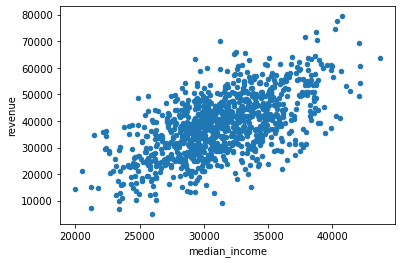

In [9]:
#create a scatter plot between median_income and revenue of the store

df.plot.scatter(x='median_income', y='revenue')

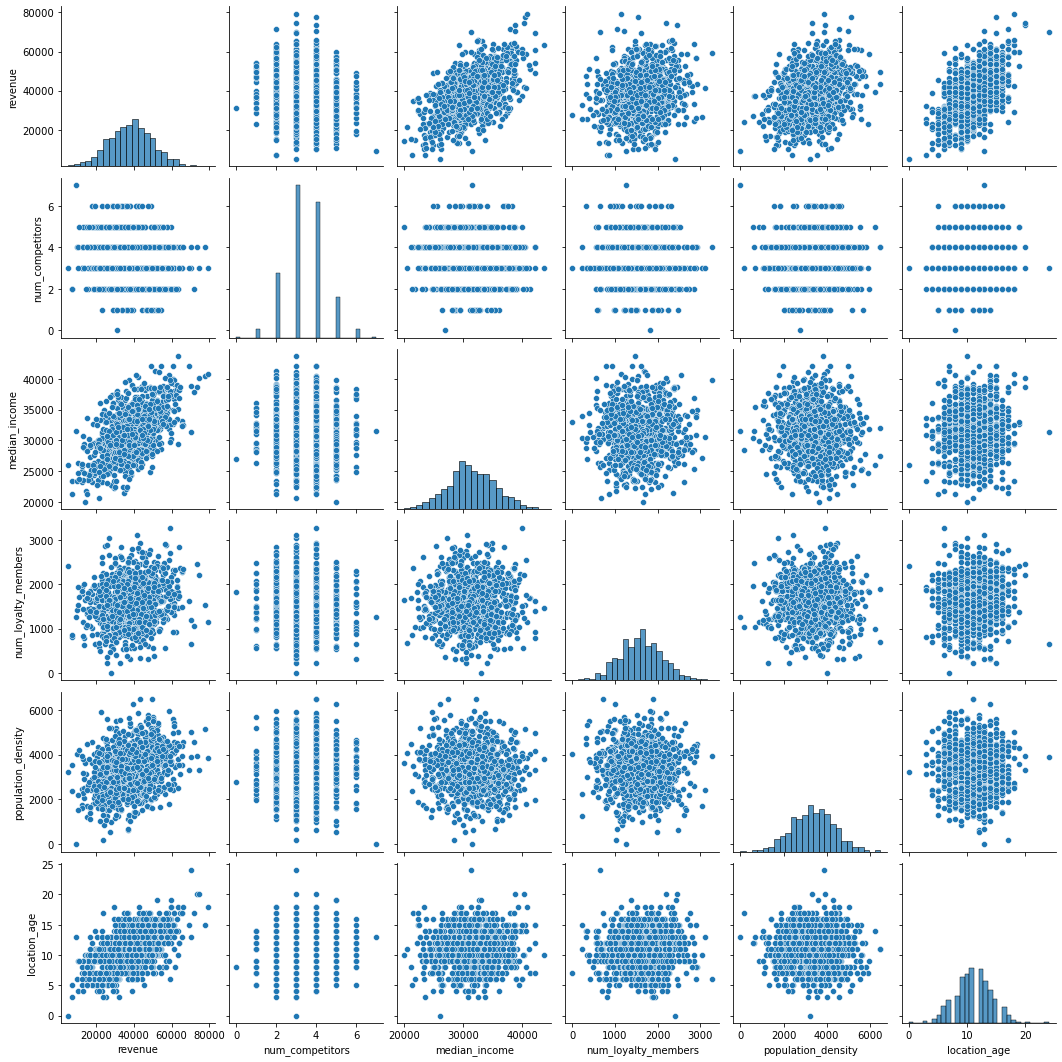

In [11]:
#Use seaborn pairplot to visualize the data and its relationships
sns.pairplot(df)

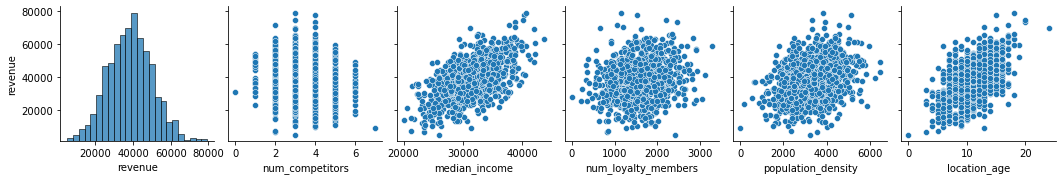

In [15]:
# Use y_vars parameters and plot only the row for associations with the revenue variable:

sns.pairplot(df, x_vars = df.columns, y_vars = "revenue")

In [16]:
"""Calculate the correlations using the appropriate methods to quantify the relationships between the different variables and location revenue
Analyze the data so that you can answer the following: 

1. Which variables have the highest association with revenue?
2. Do the associations make business sense? 
"""

df.corr()



,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


In [17]:
"""1. Median income, location_age
2. Yes, The more competitors in the area, the lower the revenue of that location. Median income, loyalty members, and population desity are all positively related.
Location age is also positively related with revenue, indicating the longer that the location is open the better it is known. """

'1. Median income, location_age\n2. Yes, The more competitors in the area, the lower the revenue of that location. Median income, loyalty members, and population desity are all positively related.\nLocation age is also positively related with revenue, indicating the longer that the location is open the better it is known. '

End 5.01


5.02 Predicting Store Revenue using Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [26]:
X = df[['num_competitors',
     'median_income',
       'num_loyalty_members',
       'population_density',
       'location_age']]

y= df['revenue']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [31]:
model.intercept_

-51068.6364423637

In [39]:
single_location = pd.DataFrame({ 'num_competitors':[3],
                                'median_income':[30000],
                               'num_loyalty_members':[1200],
                               'population_density':[2000],
                               'location_age':[10]})
model.predict(single_location)

array([27573.21782447])

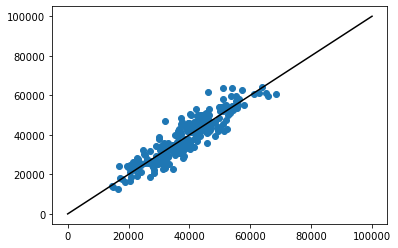

In [40]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.plot([0,100000],[0,100000],'k-')

In [41]:
import numpy as np

np.corrcoef(model.predict(X_test),y_test)


array([[1.        , 0.90615978],
       [0.90615978, 1.        ]])

The correlation around .91 is showing that the model is performing very well in predicting revenue reliably with newer or unseen data. 

End 5.02